In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.13


# Relambrando um pouco da Análise

In [2]:
# Importando os pacotes 
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Carregando o dataset
#df = pd.read_excel('TAT-SCRIPTS-HISTORICO-v3-2-QUINZENAL.xlsx', index_col=0)
df = pd.read_excel('TAT-SCRIPTS-HISTORICO-v3-4-QUINZENAL.xlsx', index_col=0)
#print(df.head())

In [4]:
# Lista todas as colunas e um pouco do dataset
print(df.describe())

          semana  scripts_feitos_no_periodo    pessoas   acumulado  \
count  12.000000                  12.000000  12.000000   12.000000   
mean    6.500000                  29.083333   1.583333  139.166667   
std     3.605551                  20.002083   0.514929  116.093875   
min     1.000000                   0.000000   1.000000    0.000000   
25%     3.750000                  13.500000   1.000000   40.500000   
50%     6.500000                  23.500000   2.000000  124.000000   
75%     9.250000                  45.250000   2.000000  230.000000   
max    12.000000                  66.000000   2.000000  338.000000   

       media_script_semanal_por_pessoa  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
count                        12.000000         0.0         0.0         0.0   
mean                         11.375000         NaN         NaN         NaN   
std                           7.888787         NaN         NaN         NaN   
min                           0.000000         NaN       

In [5]:
df

,semana,scripts_feitos_no_periodo,pessoas,data,acumulado,media_script_semanal_por_pessoa,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
index,,,,,,,,,,
1,1,0,1,2022-04-01,0,0.0,NaN,NaN,NaN,NaN
2,2,11,1,2022-05-25,11,3.0,NaN,NaN,NaN,NaN
3,3,12,1,2022-05-30,12,8.0,NaN,NaN,NaN,NaN
4,4,38,1,2022-06-15,50,19.0,NaN,NaN,NaN,NaN
5,5,27,1,2022-06-30,77,13.5,NaN,NaN,NaN,NaN
6,6,14,2,2022-07-18,91,3.5,NaN,NaN,NaN,NaN
7,7,66,2,2022-07-30,157,16.5,NaN,NaN,NaN,NaN
8,8,18,2,2022-08-14,175,4.5,NaN,NaN,NaN,NaN
9,9,50,2,2022-08-30,225,12.5,NaN,NaN,NaN,NaN


In [6]:
df.corr()['acumulado']

semana                             0.986664
scripts_feitos_no_periodo          0.622035
pessoas                            0.830063
acumulado                          1.000000
media_script_semanal_por_pessoa    0.650297
Unnamed: 7                              NaN
Unnamed: 8                              NaN
Unnamed: 9                              NaN
Unnamed: 10                             NaN
Name: acumulado, dtype: float64

In [7]:
acumulado = df['acumulado']

In [8]:
#df = df.drop(['data', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
df = df.drop(['data'], axis=1)

In [9]:
df['acumulado'] = acumulado

In [10]:
df

,semana,scripts_feitos_no_periodo,pessoas,acumulado,media_script_semanal_por_pessoa,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
index,,,,,,,,,
1,1,0,1,0,0.0,NaN,NaN,NaN,NaN
2,2,11,1,11,3.0,NaN,NaN,NaN,NaN
3,3,12,1,12,8.0,NaN,NaN,NaN,NaN
4,4,38,1,50,19.0,NaN,NaN,NaN,NaN
5,5,27,1,77,13.5,NaN,NaN,NaN,NaN
6,6,14,2,91,3.5,NaN,NaN,NaN,NaN
7,7,66,2,157,16.5,NaN,NaN,NaN,NaN
8,8,18,2,175,4.5,NaN,NaN,NaN,NaN
9,9,50,2,225,12.5,NaN,NaN,NaN,NaN


Ajustando a média quinzenal em 'media_script_semanal_por_pessoa'

In [11]:
df['media_script_semanal_por_pessoa'] = df['media_script_semanal_por_pessoa'] * 2

In [12]:
# AS VEZES TEMOS A NECESSIDADE DE RETIRAR COLUNAS VAZIAS
df = df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)

In [13]:
df

,semana,scripts_feitos_no_periodo,pessoas,acumulado,media_script_semanal_por_pessoa
index,,,,,
1,1,0,1,0,0.0
2,2,11,1,11,6.0
3,3,12,1,12,16.0
4,4,38,1,50,38.0
5,5,27,1,77,27.0
6,6,14,2,91,7.0
7,7,66,2,157,33.0
8,8,18,2,175,9.0
9,9,50,2,225,25.0


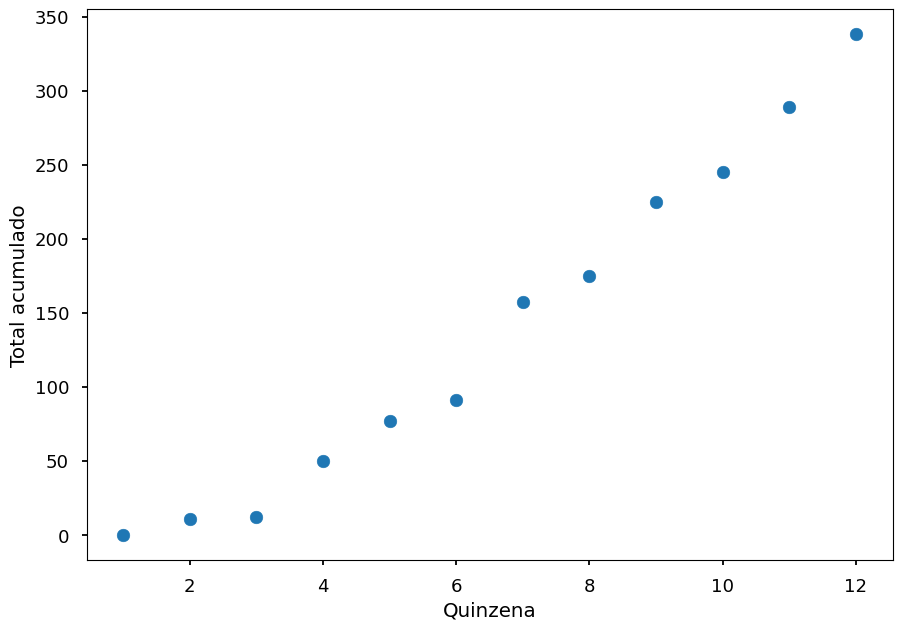

In [14]:
plt.scatter(df['semana'], df['acumulado'])
plt.xlabel('Quinzena')
plt.ylabel('Total acumulado')
plt.show()

# Extrapolando Modelo para as Semanas (ou quinzena) ate atingir 520 scripts 

In [15]:
import pickle

In [16]:
filename = 'modelo_treinado_v1.sav'

In [17]:
loaded_model = pickle.load(open(filename, 'rb'))

In [18]:
#resultado1 = loaded_model.predict(X_teste)

In [19]:
print(df.describe())

          semana  scripts_feitos_no_periodo    pessoas   acumulado  \
count  12.000000                  12.000000  12.000000   12.000000   
mean    6.500000                  29.083333   1.583333  139.166667   
std     3.605551                  20.002083   0.514929  116.093875   
min     1.000000                   0.000000   1.000000    0.000000   
25%     3.750000                  13.500000   1.000000   40.500000   
50%     6.500000                  23.500000   2.000000  124.000000   
75%     9.250000                  45.250000   2.000000  230.000000   
max    12.000000                  66.000000   2.000000  338.000000   

       media_script_semanal_por_pessoa  
count                        12.000000  
mean                         22.750000  
std                          15.777573  
min                           0.000000  
25%                           8.500000  
50%                          22.500000  
75%                          34.250000  
max                          48.000000  


In [20]:
semana_inicio = 13
semana_limite = 22
meta_scripts = 520

In [22]:
predicao_scripts = []
predicao_array = []
semanas_range = []

#eg.predict(np.array([[13, 1, 8,16]]))

# (np.array([predicao_scripts]))

for k in range(semana_inicio, semana_limite  ):
    
    # predicao_scripts= reg.predict(np.array([[k, 2, 8,16]]))  
    # Colocado a média de scripts quinzenal para 2 pessoas que é 20.
    
    predicao_scripts = loaded_model.predict(np.array([[k, 2, 20,24]]))
    
    semanas_range.append(k)
    predicao_array.append(int(predicao_scripts[0]))
    print("Semana " + str(k) )
    print(int(predicao_scripts[0]))
    if int(predicao_scripts[0]) >= 520:
        break

Semana 13
371
Semana 14
414
Semana 15
457
Semana 16
500
Semana 17
543


In [23]:
semanas_range

[13, 14, 15, 16, 17]

In [24]:
predicao_array

[371, 414, 457, 500, 543]

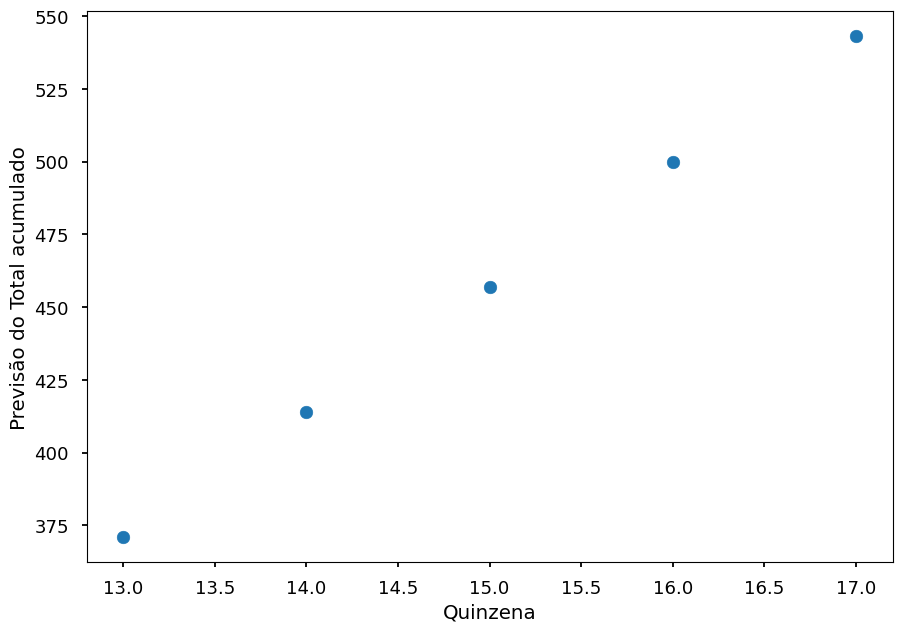

In [25]:
plt.scatter(semanas_range,predicao_array)
plt.xlabel('Quinzena')
plt.ylabel('Previsão do Total acumulado')
plt.show()

Fim da Analise

https://www.linx.com.br

# Fim

### Obrigado

### Visite a Linx - <a href="http://linx.com.br">Site da Linx</a>